<a href="https://colab.research.google.com/github/SentinelError/GymData/blob/main/GymData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import random
import numpy as np

# Define Gender
gender = ['Male', 'Female']

# Define Workouts
workout = ['Yoga', 'Cardio', 'HIIT', 'Core', 'Strength']

# Helper Functions
def generate_age():
    return random.randint(18, 65)

def generate_weight(gender):
    if gender == 'Male':
        return round(random.uniform(50, 300), 1)  # Rounded to 1 decimal
    elif gender == 'Female':
        return round(random.uniform(30, 250), 1)  # Rounded to 1 decimal

def generate_height(gender):
    if gender == 'Male':
        return round(random.uniform(1.5, 2.1), 1)  # Rounded to 1 decimal
    elif gender == 'Female':
        return round(random.uniform(1.5, 2.0), 1)  # Rounded to 1 decimal

def generate_BMI(weight, height):
    bmi = weight / (height ** 2)
    return int(bmi)  # BMI should be an integer

def generate_BPM(weight, workout_type):
    workout_bpm_ranges = {
        'Yoga': (90, 110),
        'Cardio': (120, 140),
        'HIIT': (140, 180),
        'Core': (110, 130),
        'Strength': (100, 120)
    }

    base_min, base_max = workout_bpm_ranges[workout_type]
    weight_factor = (weight - 50) / 50
    adjustment = random.uniform(0, weight_factor * 10)
    bpm = random.uniform(base_min + adjustment, base_max + adjustment)
    return int(bpm)

def generate_session_duration(avg_bpm):
    if avg_bpm < 100:
        return round(random.uniform(1.5, 2.0), 1)
    elif 100 <= avg_bpm <= 140:
        return round(random.uniform(1.0, 1.5), 1)
    else:
        return round(random.uniform(0.5, 1.0), 1)

def calculate_calories_burned(gender, heart_rate, weight, age, session_duration):
    session_duration_minutes = session_duration * 60
    if gender == "Male":
        calories_per_minute = (-55.0969 + (0.6309 * heart_rate) + (0.1988 * weight) + (0.2017 * age)) / 4.184
    elif gender == "Female":
        calories_per_minute = (-20.4022 + (0.4472 * heart_rate) - (0.1263 * weight) + (0.074 * age)) / 4.184
    else:
        raise ValueError("Gender must be 'Male' or 'Female'")
    total_calories = calories_per_minute * session_duration_minutes
    return round(total_calories, 2)

# Generate Data
data = []

for _ in range(4000):  # Generate 4000 rows
    g = random.choice(gender)
    w = generate_weight(g)
    h = generate_height(g)
    age = generate_age()
    bmi = generate_BMI(w, h)
    wk = random.choice(workout)
    bpm = generate_BPM(w, wk)
    duration = generate_session_duration(bpm)
    calories = calculate_calories_burned(g, bpm, w, age, duration)

    # Add data to the list
    data.append([g, age, w, h, bmi, bpm, wk, duration, calories])

# Create DataFrame
df = pd.DataFrame(data, columns=['Gender', 'Age', 'Weight', 'Height', 'BMI', 'BPM', 'Workout', 'Session Duration (hrs)', 'Calories Burned'])

# Introduce 1% nulls in BPM, Session Duration, Calories Burned, and BMI columns
num_nulls = int(0.01 * len(df))
null_indices = random.sample(range(len(df)), num_nulls)
for col in ['BPM', 'Session Duration (hrs)', 'Calories Burned', 'BMI']:
    df.loc[null_indices, col] = np.nan

outlier_columns = ['BPM', 'Session Duration (hrs)', 'Calories Burned', 'BMI']

# Define outlier percentages for each column
outlier_percentages = {
    'BPM': 0.002,               # 0.5% outliers for BPM
    'Session Duration (hrs)': 0.002,  # 0.3% outliers for Session Duration
    'Calories Burned': 0.001,   # 0.2% outliers for Calories Burned
    'BMI': 0.001               # 0.4% outliers for BMI
}

# Generate outliers and assign them to columns
for col in outlier_columns:
    num_outliers = int(outlier_percentages[col] * len(df))  # Adjusted for each column
    outlier_indices = random.sample(range(len(df)), num_outliers)

    if col == 'BPM':
        outlier_values = [np.random.uniform(180, 300) for _ in range(num_outliers)]  # Outliers capped at 450 BPM
    elif col == 'Session Duration (hrs)':
        outlier_values = [np.random.uniform(2.5, 4.0) for _ in range(num_outliers)]  # Outliers capped at 4 hours
    elif col == 'Calories Burned':
        outlier_values = [np.random.uniform(3000, 4000) for _ in range(num_outliers)]  # Outliers capped at 4000 calories
    elif col == 'BMI':
        outlier_values = [random.randint(35, 50) for _ in range(num_outliers)]  # BMI capped at 50 as an integer

    # Distribute outlier values evenly across columns
    for idx, value in zip(outlier_indices, outlier_values):
        df.loc[idx, col] = value


# Export to CSV
df.to_csv('demo_workout_data.csv', index=False)

print("CSV file 'demo_workout_data.csv' has been generated successfully.")


CSV file 'demo_workout_data.csv' has been generated successfully.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = "demo_workout_data.csv"
df = pd.read_csv(file_path)

Correlation Matrix:
                             Age    Weight    Height       BMI       BPM  \
Age                     1.000000 -0.036482 -0.007671 -0.027343 -0.004715   
Weight                 -0.036482  1.000000  0.050053  0.901103  0.292781   
Height                 -0.007671  0.050053  1.000000 -0.346511  0.033777   
BMI                    -0.027343  0.901103 -0.346511  1.000000  0.250840   
BPM                    -0.004715  0.292781  0.033777  0.250840  1.000000   
Session Duration (hrs) -0.012633 -0.200588 -0.011358 -0.178328 -0.674078   
Calories Burned         0.031614  0.373408  0.103694  0.305800  0.156144   

                        Session Duration (hrs)  Calories Burned  
Age                                  -0.012633         0.031614  
Weight                               -0.200588         0.373408  
Height                               -0.011358         0.103694  
BMI                                  -0.178328         0.305800  
BPM                                  -0.6

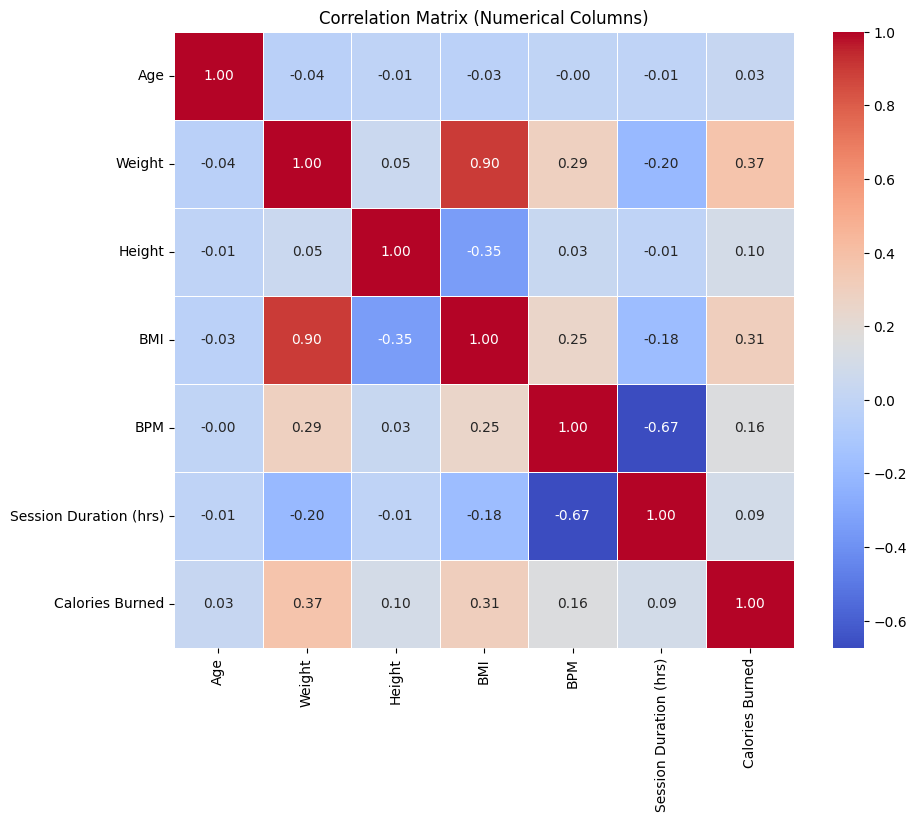

In [4]:
numerical_columns = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Numerical Columns)")
plt.show()

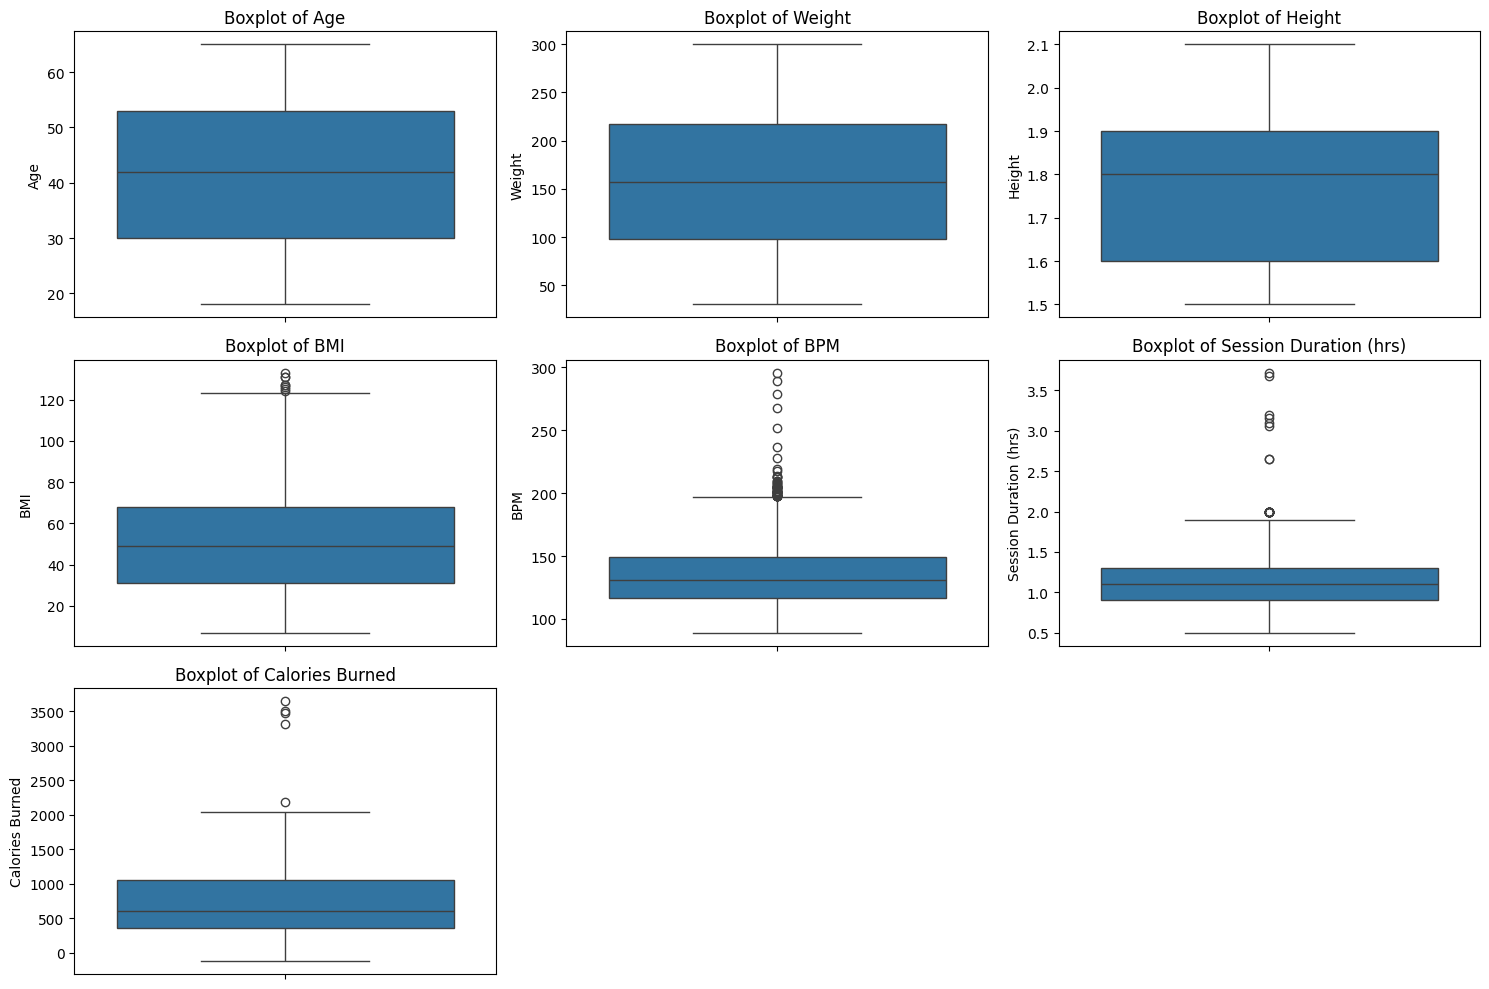

In [5]:
# prompt: Plot the graph box graph for the dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "demo_workout_data.csv"
df = pd.read_csv(file_path)

# Select numerical columns for boxplot
numerical_cols = ['Age', 'Weight', 'Height', 'BMI', 'BPM', 'Session Duration (hrs)', 'Calories Burned']

# Create boxplots for each numerical column
plt.figure(figsize=(15, 10))  # Adjust figure size for better visualization

for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()  # Adjust layout for better spacing between subplots
plt.show()